Individual Assignment 3 - Stable marriage problem / Gale Shapley Algorithm | Sophie Merl 

Import packages

In [90]:
from time import perf_counter_ns
import random as random
import pandas as pd
import matplotlib.pyplot as plt

Class Person

In [109]:
class Person:
    def __init__(self, name):
        self.name = name
        self.preferences = None
        self.partner = None

    def set_pref(self, pref):
        self.preferences = pref
        
    def get_pref(self):
        return self.preferences[0]
    
    def get_pref_index(self, person):
        return self.preferences.index(person)    
    
    def he_proposing(self, woman):
        self.partner = woman.she_evaluating(self)
    
    def she_evaluating(self, man):
        if self.partner is None:
            self.partner = man
            return self
        elif self.get_pref_index(man) < self.get_pref_index(self.partner):
            self.breaking_up(self.partner)
            self.partner = man
            return self
        else:
            man.preferences.remove(self)
            
    def breaking_up(self, ex):
        ex.partner = None
        ex.preferences.remove(self)

Gale shapley algorithm

In [110]:
def gale_shapley_algorithm(males,females):
    w = 0
    while w <= len(females):
        for men in males:
            if men.partner is None:
                woman = men.get_pref()
                men.he_proposing(woman)
        w += 1  

Defining males 

In [111]:
A = Person(name = "A")
B = Person(name = "B")
C = Person(name = "C")
D = Person(name = "D")
E = Person(name = "E")

Defining females

In [112]:
L = Person(name = "L")
M = Person(name = "M")
N = Person(name = "N")
O = Person(name = "O")
P = Person(name = "P")

Set preferences

In [113]:
A.set_pref([O, M, N, L, P])
B.set_pref([P, N, M, L, O])
C.set_pref([M, P, L, O, N])
D.set_pref([P, M, O, N, L])
E.set_pref([O, L, M, N, P])
L.set_pref([D, B, E, C, A])
M.set_pref([B, A, D, C, E])
N.set_pref([A, C, E, D, B])
O.set_pref([D, A, C, B, E])
P.set_pref([B, E, A, C, D])

Create lists

In [114]:
males = [A, B, C, D, E]
females = [L, M, N, O, P]

Gale shapley

In [115]:
gale_shapley_algorithm(males, females)

Show couples

In [116]:
print("A married " + A.partner.name)
print("B married " + B.partner.name)
print("C married " + C.partner.name)
print("D married " + D.partner.name)
print("E married " + E.partner.name)
print("L married " + L.partner.name)
print("M married " + M.partner.name)
print("N married " + N.partner.name)
print("O married " + O.partner.name)
print("P married " + P.partner.name)

A married O
B married P
C married N
D married M
E married L
L married E
M married D
N married C
O married A
P married B


Time complexity

In [118]:
data_time = []
persons = []
items = 500
for test in range(7):
    items *= 2
    persons.append(items)
    l = list(range(items))
    list_males = l[:items//2]
    list_females = l[items//2:]

    males = [Person(i) for i in list_males]
    females = [Person(i) for i in list_females]

    for i in males:
        random.shuffle(females)
        i.set_pref(females)

    for i in females:
        random.shuffle(males)
        i.set_pref(males)

    time_start = perf_counter_ns()
    gale_shapley_algorithm(males, females)
    time_span = perf_counter_ns() - time_start
    time_in_sec = (time_span / 1000000000)
    data_time.append(time_in_sec)

In [106]:
data = {"Persons": persons,
        "Time in sec": data_time}

In [107]:
df = pd.DataFrame(data)
print(df)

   Persons  Time in sec
0     1000     0.003982
1     2000     0.014669
2     4000     0.057599
3     8000     0.229421
4    16000     0.923544
5    32000     3.764621
6    64000    15.001383


Plot time complexity (We observe O(n^2))

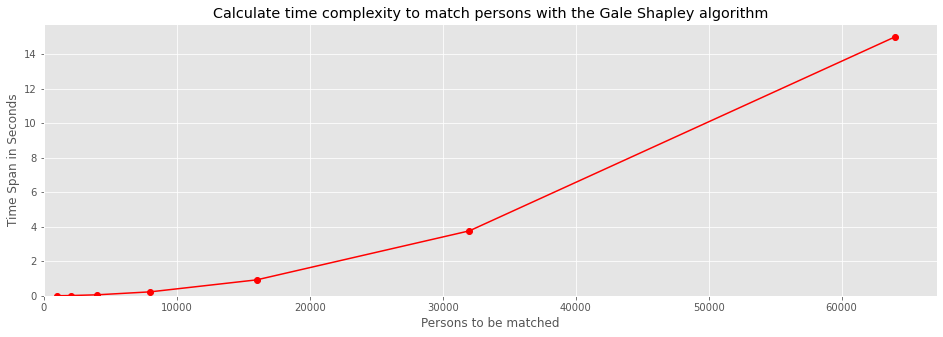

In [108]:
plt.figure(figsize=(16,5))
plt.style.use("ggplot")

plt.plot(df["Persons"], df["Time in sec"],
        marker = "o",
        color = "red",
        label = "Time Span")

plt.xlabel("Persons to be matched")
plt.xlim(xmin=0)
plt.ylabel("Time Span in Seconds")
plt.ylim(ymin=0)
plt.title("Calculate time complexity to match persons with the Gale Shapley algorithm")
plt.show()